## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv")

In [3]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Expanding the Questions

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

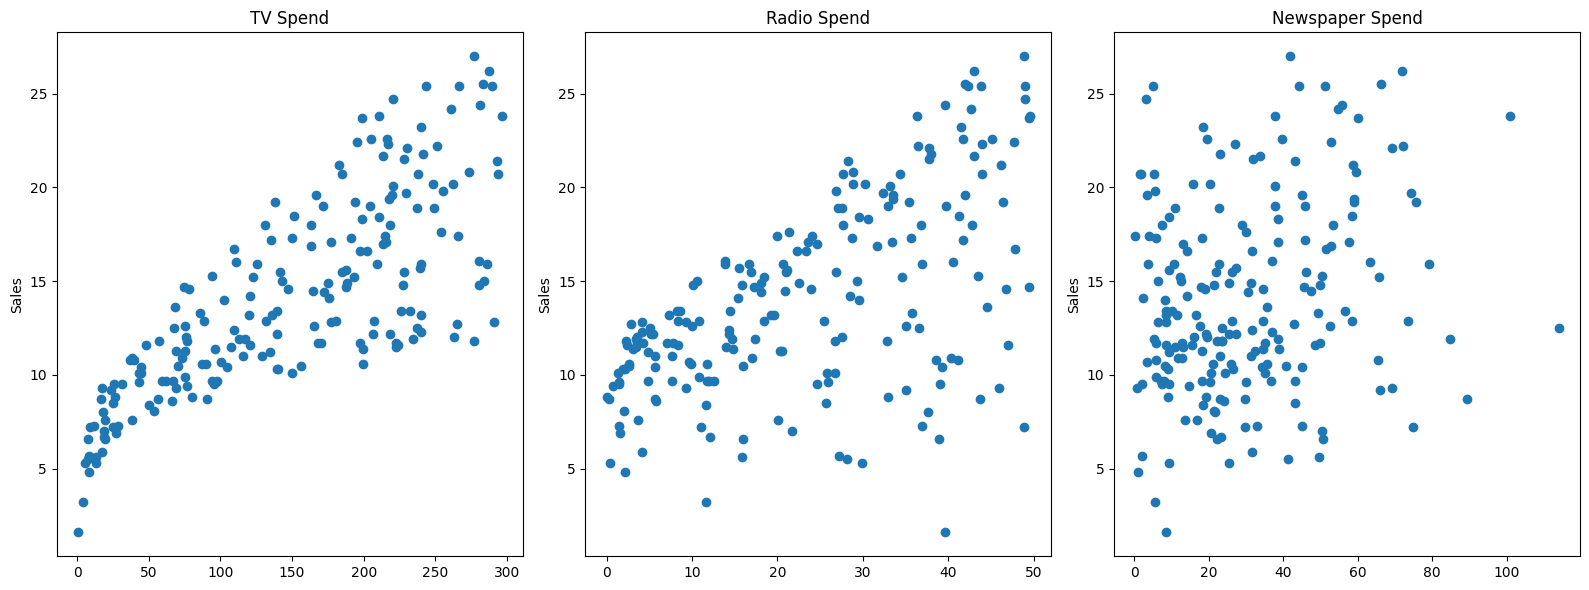

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

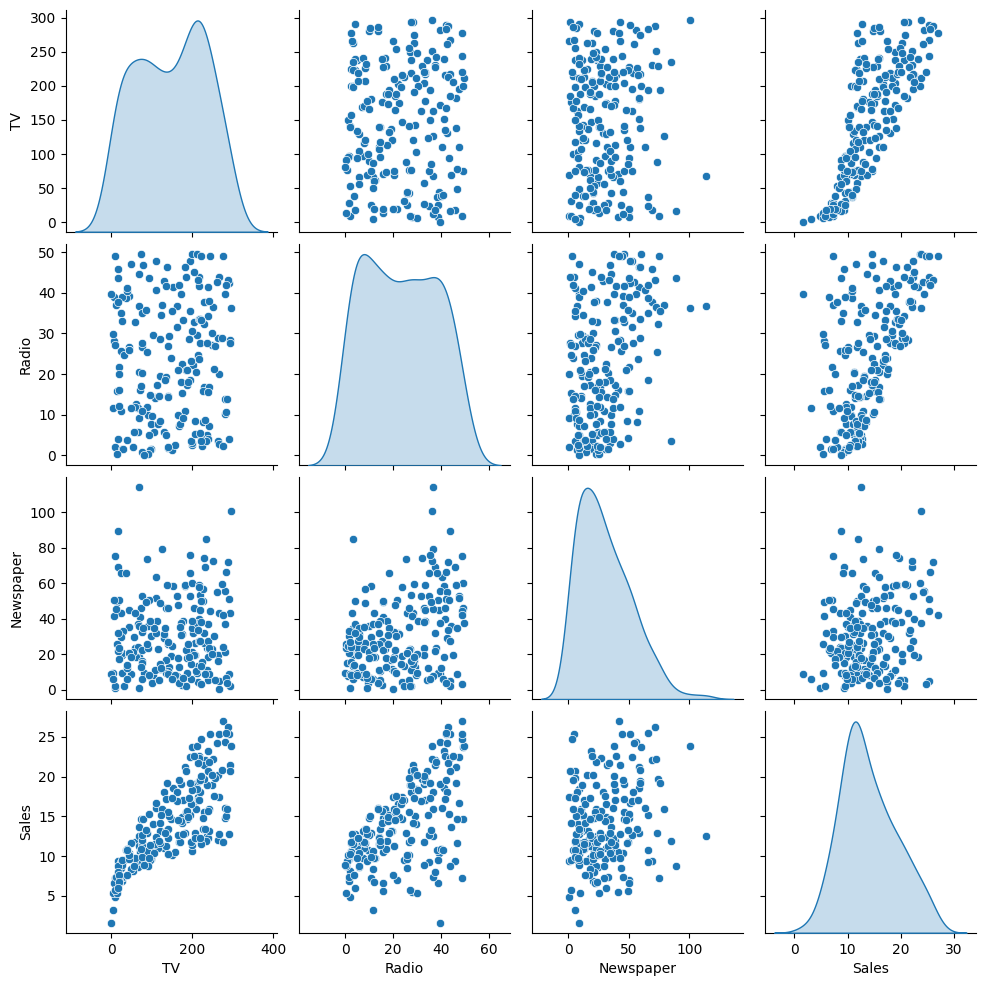

In [7]:
# Relationships between features
sns.pairplot(df.drop("ID",axis=1),diag_kind='kde')

In [12]:
X = df.drop(['ID','Sales'],axis=1)
y = df['Sales']

## Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
X_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [16]:
y_train

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 160, dtype: float64

In [17]:
X_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [18]:
y_test

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales, dtype: float64

## Creating a Model (Estimator)

#### Import a model class from a model family

In [19]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [20]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [21]:
model = LinearRegression()

In [46]:
X_train

,TV,Radio,Newspaper
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


### Fit/Train the Model on the training data

**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [22]:
model.fit(X_train,y_train)

LinearRegression()

### Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### Calculate Performance on Test Set

In [23]:
test_predictions = model.predict(X_test)

In [24]:
test_predictions

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [27]:
MAE

1.3617813502090275

In [28]:
MSE

4.402118291449685

In [29]:
RMSE

2.0981225634956804

In [30]:
df['Sales'].mean()

14.0225

### Plotting Residuals

It's also important to plot out residuals and check for normal distribution, this helps us understand if Linear Regression was a valid model choice.

In [31]:
# Predictions on training and testing sets
# Doing residuals separately will alert us to any issue with the split call
test_predictions = model.predict(X_test)

In [32]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions

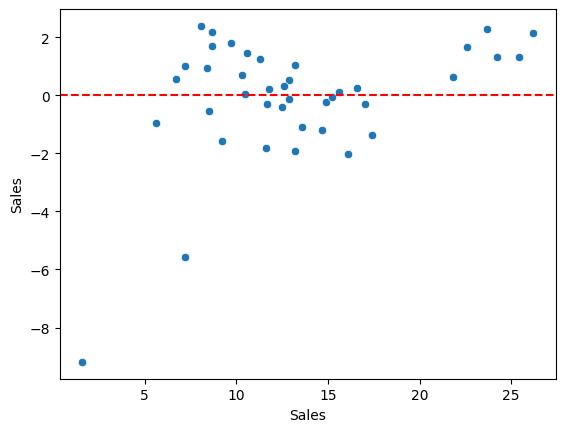

In [33]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
len(test_res)

40

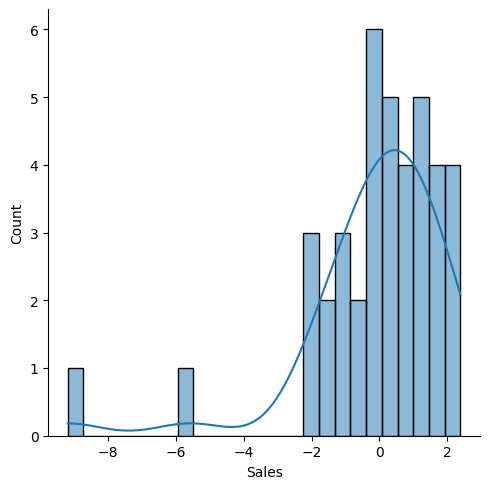

In [35]:
sns.displot(test_res,bins=25,kde=True)

Still unsure if normality is a reasonable approximation? We can check against the [normal probability plot.](https://en.wikipedia.org/wiki/Normal_probability_plot)

In [36]:
import scipy as sp

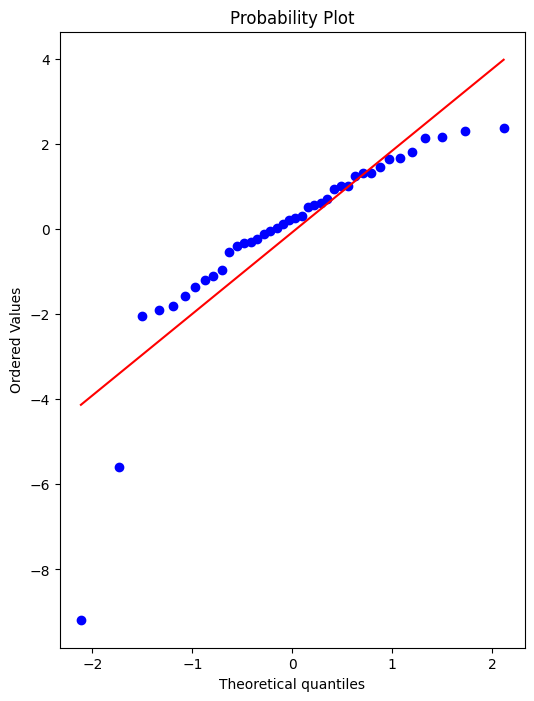

In [37]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [38]:
final_model = LinearRegression()

In [39]:
final_model.fit(X,y)

LinearRegression()

Note how it may not really make sense to recalulate RMSE metrics here, since the model has already seen all the data, its not a fair judgement of performance to calculate RMSE on data its already seen, thus the purpose of the previous examination of test performance.

## Deployment, Predictions, and Model Attributes

### Final Model Fit

Note, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [40]:
y_hat = final_model.predict(X)

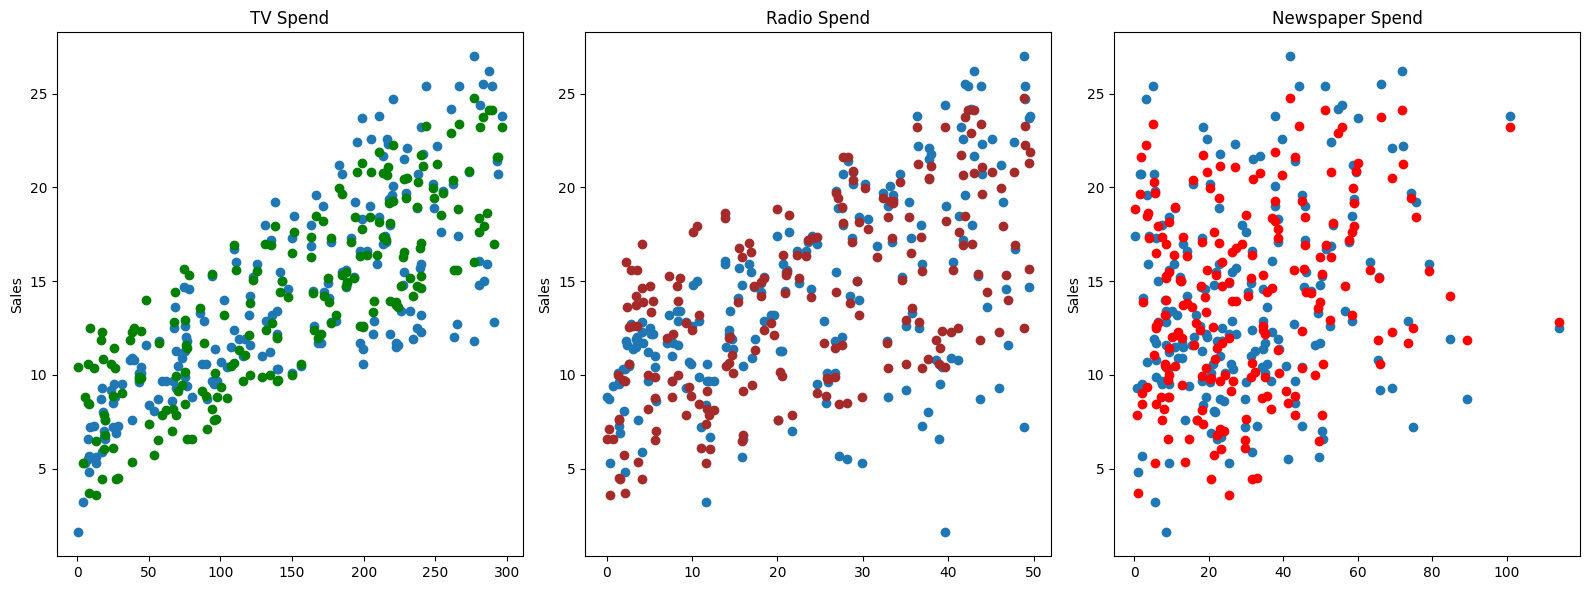

In [45]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['Sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='green')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['Radio'],df['Sales'],'o')
axes[1].plot(df['Radio'],y_hat,'o',color='brown')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['Newspaper'],df['Sales'],'o')
axes[2].plot(df['Newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals

Should be normally distributed as discussed in the video.

In [47]:
residuals = y_hat - y

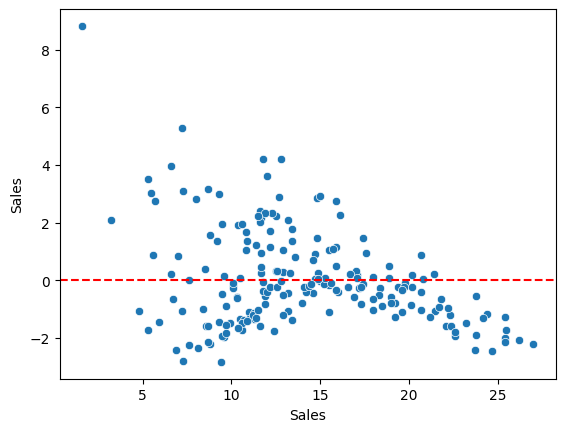

In [48]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Coefficients

In [49]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [50]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


Interpreting the coefficients:

---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in TV Spend is associated with an increase in sales of  0.045 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.
----

---
---
* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Radio Spend is associated with an increase in sales of  0.188 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Radio Ads, we could expect 188 more units sold.
----
----

* Holding all other features fixed, a 1 unit (A thousand dollars) increase in Newspaper Spend is associated with a **decrease** in sales of  0.001 "sales units", in this case 1000s of units . 
* This basically means that for every $1000 dollars spend on Newspaper Ads, we could actually expect to sell 1 less unit. Being so close to 0, this heavily implies that newspaper spend has no real effect on sales.
---
---

**Note! In this case all our units were the same for each feature (1 unit = $1000 of ad spend). But in other datasets, units may not be the same, such as a housing dataset could try to predict a sale price with both a feature for number of bedrooms and a feature of total area like square footage. In this case it would make more sense to *normalize* the data, in order to clearly compare features and results. We will cover normalization later on.**

In [52]:
df.drop("ID",axis=1).corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


### Prediction on New Data

Recall , X_test data set looks *exactly* the same as brand new data, so we simply need to call .predict() just as before to predict sales for a new advertising campaign.

**Our next ad campaign will have a total spend of 149k on TV, 22k on Radio, and 12k on Newspaper Ads, how many units could we expect to sell as a result of this?**

In [53]:
campaign = [[149,22,12]]

In [54]:
final_model.predict(campaign)

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

**How accurate is this prediction? No real way to know! We only know truly know our model's performance on the test data, that is why we had to be satisfied by it first, before training our full model**

-----

## Model Persistence (Saving and Loading a Model)

In [55]:
from joblib import dump, load

In [56]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [57]:
loaded_model = load('sales_model.joblib')

In [58]:
loaded_model.predict(campaign)

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])